In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Read in the CMPD data
crimeDF = pd.read_csv('CMPD_Incidents.csv', low_memory=False)
crimeDF.head()

,YEAR,INCIDENT_REPORT_ID,LOCATION,ZIP,X_COORD_PUBLIC,Y_COORD_PUBLIC,LATITUDE_PUBLIC,LONGITUDE_PUBLIC,CMPD_PATROL_DIVISION,NPA,...,DATE_INCIDENT_END,ADDRESS_DESCRIPTION,LOCATION_TYPE_DESCRIPTION,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION
0,2023,20231022-2159-03,11000 NORTHLAKE LANDING DR,28216,1446960.0,592756.0,35.364506,-80.855140,North,72,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Private Residence,Open,Open,NaN,90Z,All Other Offenses
1,2023,20231022-2151-00,5800 MONROE RD,28212,1472824.0,527355.0,35.186132,-80.764500,Independence,52,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Hotel/Motel,Open,Open,NaN,23H,All Other Thefts
2,2023,20231022-2131-00,2400 N TRYON ST,28206,1456970.0,549523.0,35.246247,-80.818913,Metro,157,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Other - Commercial Place,Open,Open,NaN,23H,All Other Thefts
3,2023,20231022-2006-03,4400 SHARON RD,28211,1453419.0,514991.0,35.151200,-80.828674,Providence,358,...,2023/10/22 00:00:00+00,Location of occurrence,Parking Lot,Retail,Shopping Mall,Open,Open,NaN,23G,Theft of Motor Vehicle Parts from Vehicle
4,2023,20231022-1958-01,4600 WATERFORD KNOLL DR,NaN,1446684.0,493480.0,35.091762,-80.849861,South,303,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Apartment/Duplex Private Res,Open,Open,NaN,802,Sudden/Natural Death Investigation


In [3]:
len(crimeDF['HIGHEST_NIBRS_DESCRIPTION'].unique())

72

In [4]:
# Look at the types of criminal offenses

crime_list = crimeDF.loc[crimeDF.duplicated(subset=['HIGHEST_NIBRS_DESCRIPTION']),'HIGHEST_NIBRS_DESCRIPTION'].unique()
crime_list

array(['All Other Thefts', 'Shoplifting', 'Theft From Motor Vehicle',
       'Simple Assault', 'Other Unlisted Non-Criminal',
       'All Other Offenses', 'Damage/Vandalism Of Property',
       'Sudden/Natural Death Investigation', 'Motor Vehicle Theft',
       'Missing Person', 'Burglary/B&E', 'Intimidation',
       'Aggravated Assault', 'Robbery', 'Identity Theft',
       'Credit Card/Teller Fraud', 'Affray', 'Impersonation',
       'Drug/Narcotic Violations', 'Disorderly Conduct',
       'Theft of Motor Vehicle Parts from Vehicle', 'Theft From Building',
       'Weapon Law Violations', 'Overdose', 'Trespass Of Real Property',
       'Public Accident', 'False Pretenses/Swindle', 'Suicide',
       'Vehicle Recovery', 'Counterfeiting/Forgery',
       'Stolen Property Offenses', 'Driving Under The Influence',
       'Extortion/Blackmail', 'Indecent Exposure', 'Kidnapping',
       'Drug Equipment Violations', 'Forcible Fondling', 'Embezzlement',
       'Hacking/Computer Invasion', 'Arson

In [5]:
# Group by Year

yearDF = crimeDF.groupby('YEAR').count()
yearDF

,INCIDENT_REPORT_ID,LOCATION,ZIP,X_COORD_PUBLIC,Y_COORD_PUBLIC,LATITUDE_PUBLIC,LONGITUDE_PUBLIC,CMPD_PATROL_DIVISION,NPA,DATE_REPORTED,...,DATE_INCIDENT_END,ADDRESS_DESCRIPTION,LOCATION_TYPE_DESCRIPTION,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION
YEAR,,,,,,,,,,,,,,,,,,,,,
2017,93449,93449,66572,90476,90476,90476,90476,93292,93449,93449,...,69259,93448,93449,93449,93449,93449,93449,39492,93449,93449
2018,91409,91409,64423,88453,88453,88453,88453,91289,91409,91409,...,67650,91409,91408,91409,91409,91409,91409,38811,91409,91409
2019,95563,95563,66232,92116,92116,92116,92116,95442,95563,95563,...,70335,95562,95563,95563,95563,95563,95563,40199,95563,95563
2020,87190,87190,59801,83321,83321,83321,83321,87068,87190,87190,...,65123,87190,87190,87190,87190,87190,87190,36925,87190,87190
2021,88213,88213,59707,85118,85118,85118,85118,88054,88213,88213,...,67045,88212,88213,88213,88213,88213,88213,36401,88213,88213
2022,92519,92519,61512,89248,89248,89248,89248,92404,92519,92519,...,70506,92519,92519,92519,92519,92519,92519,36269,92519,92519
2023,76654,76654,49715,75162,75162,75162,75162,76590,76654,76654,...,59290,76654,76654,76654,76654,76654,76654,25662,76654,76654


In [6]:
# Group by crime description and year.  Count the incidents

crime_yearDF = crimeDF.groupby(['HIGHEST_NIBRS_DESCRIPTION', 'YEAR'])['INCIDENT_REPORT_ID'].count()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(crime_yearDF)


HIGHEST_NIBRS_DESCRIPTION                   YEAR
Affray                                      2017      235
                                            2018      177
                                            2019      208
                                            2020      154
                                            2021      178
                                            2022      291
                                            2023      200
Aggravated Assault                          2017     2464
                                            2018     2439
                                            2019     2661
                                            2020     3111
                                            2021     3138
                                            2022     3060
                                            2023     2320
All Other Offenses                          2017     9478
                                            2018     9438
                       

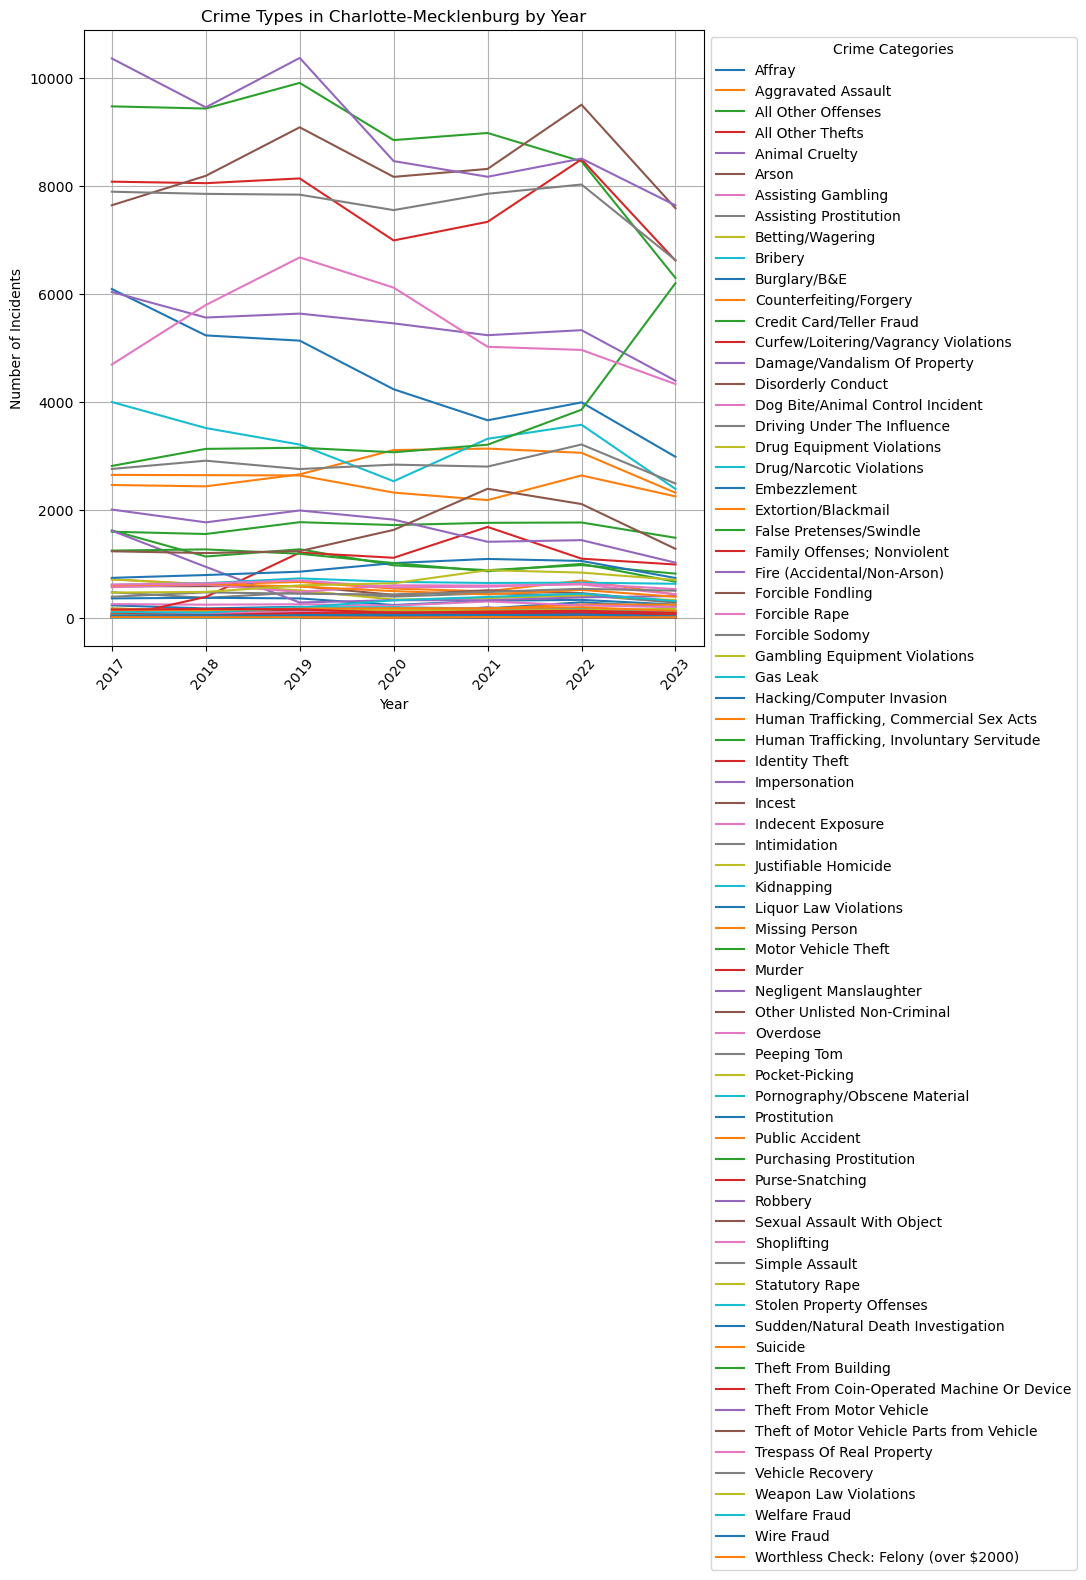

In [7]:
# Graph the types of crime over the years

figure = crime_yearDF.unstack(level=0).plot(kind='line', figsize=(8,8),rot=50, 
                                         title=f"Crime Types in Charlotte-Mecklenburg by Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Crime Categories",bbox_to_anchor=(1,1))
plt.grid()
plt.show()

In [8]:
year2017 = crimeDF[crimeDF['YEAR']==2017]
highestyear2017 = year2017['HIGHEST_NIBRS_DESCRIPTION'].value_counts()
highestyear2017.head(20)

HIGHEST_NIBRS_DESCRIPTION
Theft From Motor Vehicle                     10365
All Other Offenses                            9478
All Other Thefts                              8083
Simple Assault                                7897
Other Unlisted Non-Criminal                   7646
Burglary/B&E                                  6094
Damage/Vandalism Of Property                  6040
Shoplifting                                   4696
Drug/Narcotic Violations                      4001
Motor Vehicle Theft                           2817
Intimidation                                  2761
Missing Person                                2651
Aggravated Assault                            2464
Robbery                                       2009
Credit Card/Teller Fraud                      1622
Impersonation                                 1617
False Pretenses/Swindle                       1598
Theft From Building                           1249
Theft of Motor Vehicle Parts from Vehicle     1236
Sudde

In [9]:
year2018 = crimeDF[crimeDF['YEAR']==2018]
highestyear2018 = year2018['HIGHEST_NIBRS_DESCRIPTION'].value_counts()
highestyear2018.head(10)

HIGHEST_NIBRS_DESCRIPTION
Theft From Motor Vehicle        9460
All Other Offenses              9438
Other Unlisted Non-Criminal     8191
All Other Thefts                8055
Simple Assault                  7857
Shoplifting                     5798
Damage/Vandalism Of Property    5566
Burglary/B&E                    5235
Drug/Narcotic Violations        3519
Motor Vehicle Theft             3133
Name: count, dtype: int64

In [10]:
# See the five highest crimes in 2019

year2019 = crimeDF[crimeDF['YEAR']==2019]
highestyear2019 = year2019['HIGHEST_NIBRS_DESCRIPTION'].value_counts()
highestyear2019.head(10)


HIGHEST_NIBRS_DESCRIPTION
Theft From Motor Vehicle        10375
All Other Offenses               9913
Other Unlisted Non-Criminal      9090
All Other Thefts                 8143
Simple Assault                   7842
Shoplifting                      6680
Damage/Vandalism Of Property     5639
Burglary/B&E                     5138
Drug/Narcotic Violations         3213
Motor Vehicle Theft              3154
Name: count, dtype: int64

In [11]:
year2020 = crimeDF[crimeDF['YEAR']==2020]
highestyear2020 = year2020['HIGHEST_NIBRS_DESCRIPTION'].value_counts()
highestyear2020.gt(2000).head(20)

HIGHEST_NIBRS_DESCRIPTION
All Other Offenses                            True
Theft From Motor Vehicle                      True
Other Unlisted Non-Criminal                   True
Simple Assault                                True
All Other Thefts                              True
Shoplifting                                   True
Damage/Vandalism Of Property                  True
Burglary/B&E                                  True
Aggravated Assault                            True
Motor Vehicle Theft                           True
Intimidation                                  True
Drug/Narcotic Violations                      True
Missing Person                                True
Robbery                                      False
False Pretenses/Swindle                      False
Theft of Motor Vehicle Parts from Vehicle    False
Identity Theft                               False
Theft From Building                          False
Sudden/Natural Death Investigation           False
Credi

In [12]:
year2021 = crimeDF[crimeDF['YEAR']==2021]
highestyear2021 = year2021['HIGHEST_NIBRS_DESCRIPTION'].value_counts()
highestyear2021.head(20).gt(2000)

HIGHEST_NIBRS_DESCRIPTION
All Other Offenses                            True
Other Unlisted Non-Criminal                   True
Theft From Motor Vehicle                      True
Simple Assault                                True
All Other Thefts                              True
Damage/Vandalism Of Property                  True
Shoplifting                                   True
Burglary/B&E                                  True
Drug/Narcotic Violations                      True
Motor Vehicle Theft                           True
Aggravated Assault                            True
Intimidation                                  True
Theft of Motor Vehicle Parts from Vehicle     True
Missing Person                                True
False Pretenses/Swindle                      False
Identity Theft                               False
Robbery                                      False
Sudden/Natural Death Investigation           False
Weapon Law Violations                        False
Credi

In [13]:
year2022 = crimeDF[crimeDF['YEAR']==2022]
highestyear2022 = year2022['HIGHEST_NIBRS_DESCRIPTION'].value_counts()
highestyear2022.head(10)

HIGHEST_NIBRS_DESCRIPTION
Other Unlisted Non-Criminal     9508
Theft From Motor Vehicle        8511
All Other Thefts                8497
All Other Offenses              8459
Simple Assault                  8030
Damage/Vandalism Of Property    5332
Shoplifting                     4966
Burglary/B&E                    3994
Motor Vehicle Theft             3859
Drug/Narcotic Violations        3580
Name: count, dtype: int64

In [14]:
year2023 = crimeDF[crimeDF['YEAR']==2023]
highestyear2023 = year2023['HIGHEST_NIBRS_DESCRIPTION'].value_counts()
highestyear2023.head(10)

HIGHEST_NIBRS_DESCRIPTION
Theft From Motor Vehicle        7644
Other Unlisted Non-Criminal     7590
Simple Assault                  6630
All Other Thefts                6621
All Other Offenses              6299
Motor Vehicle Theft             6203
Damage/Vandalism Of Property    4395
Shoplifting                     4334
Burglary/B&E                    2986
Intimidation                    2491
Name: count, dtype: int64

In [15]:
# Read in the  data
highestDF = pd.read_csv('2021Above2000.csv', low_memory=False)
highestDF.head()

,YEAR,INCIDENT_REPORT_ID,HIGHEST_NIBRS_DESCRIPTION
0,2023,20231022-2159-03,All Other Offenses
1,2023,20231022-2151-00,All Other Thefts
2,2023,20231022-2131-00,All Other Thefts
3,2023,20231022-1955-01,Theft From Motor Vehicle
4,2023,20231022-1934-01,Shoplifting


In [16]:
high_yearDF = highestDF.groupby(['HIGHEST_NIBRS_DESCRIPTION', 'YEAR'])['INCIDENT_REPORT_ID'].count()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(high_yearDF)

HIGHEST_NIBRS_DESCRIPTION     YEAR
Aggravated Assault            2017     2464
                              2018     2439
                              2019     2661
                              2020     3111
                              2021     3138
                              2022     3060
                              2023     2320
All Other Offenses            2017     9478
                              2018     9438
                              2019     9913
                              2020     8853
                              2021     8985
                              2022     8459
                              2023     6299
All Other Thefts              2017     8083
                              2018     8055
                              2019     8143
                              2020     6994
                              2021     7339
                              2022     8497
                              2023     6621
Burglary/B&E                  2017     60

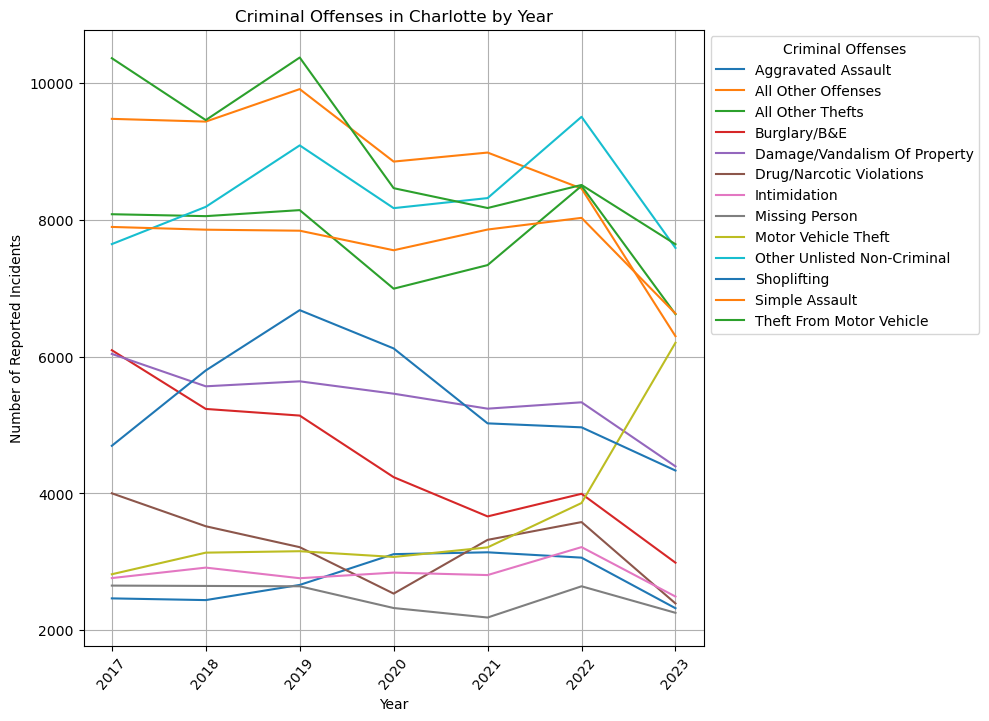

In [17]:
figure2 = high_yearDF.unstack(level=0).plot(kind='line', figsize=(8,8),rot=50, 
                                         title=f"Criminal Offenses in Charlotte by Year")
plt.xlabel("Year")
plt.ylabel("Number of Reported Incidents")
plt.legend(title="Criminal Offenses",bbox_to_anchor=(1,1))
plt.grid()
plt.show()

In [18]:
# Simplified
simplifiedDF = pd.read_csv('simplified-non-crime.csv', low_memory=False)
simplifiedDF.head()

,YEAR,INCIDENT_REPORT_ID,HIGHEST_NIBRS_DESCRIPTION
0,2023,20231022-2159-03,All Other Offenses
1,2023,20231022-2151-00,All Other Thefts
2,2023,20231022-2131-00,All Other Thefts
3,2023,20231022-1955-01,Theft From Motor Vehicle
4,2023,20231022-1934-01,Shoplifting


In [19]:
simplified_yearDF = simplifiedDF.groupby(['HIGHEST_NIBRS_DESCRIPTION', 'YEAR'])['INCIDENT_REPORT_ID'].count()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(simplified_yearDF)

HIGHEST_NIBRS_DESCRIPTION     YEAR
All Other Offenses            2017     9478
                              2018     9438
                              2019     9913
                              2020     8853
                              2021     8985
                              2022     8459
                              2023     6299
All Other Thefts              2017     8083
                              2018     8055
                              2019     8143
                              2020     6994
                              2021     7339
                              2022     8497
                              2023     6621
Burglary/B&E                  2017     6094
                              2018     5235
                              2019     5138
                              2020     4237
                              2021     3663
                              2022     3994
                              2023     2986
Damage/Vandalism Of Property  2017     60

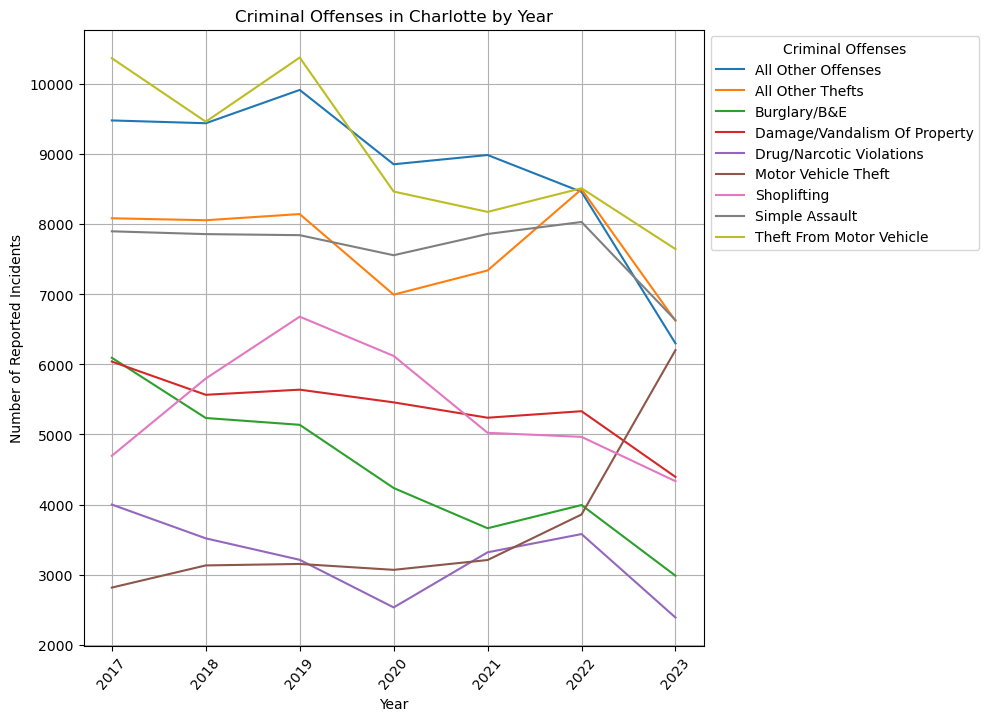

In [20]:
figure3 = simplified_yearDF.unstack(level=0).plot(kind='line', figsize=(8,8),rot=50, 
                                         title=f"Criminal Offenses in Charlotte by Year")
plt.xlabel("Year")
plt.ylabel("Number of Reported Incidents")
plt.legend(title="Criminal Offenses",bbox_to_anchor=(1,1))
plt.grid()
plt.show()